# Project

##  Restaurant Review Analysis/Restaurant sentiment analysis

### Problem stetment 

Normally, a lot of businesses are remained as failures due to lack of profit, lack of proper improvement measures. Mostly, restaurant owners face a lot of difficulties to improve their productivity. This project really helps those who want to increase their productivity, which in turn increases their business profits. This is the main objective of this project.

What the project does is that the restaurant owner gets to know about drawbacks of his restaurant such as most disliked food items of his restaurant by customer’s text review which is processed with ML classification algorithm(Naive Bayes)

The purpose of this analysis is to build a prediction model to predict whether a review on the restaurant is positive or negative. To do so, we will work on Restaurant Review dataset, we will load it into predicitve algorithms Multinomial Naive Bayes, Bernoulli Naive Bayes and Logistic Regression. In the end, we hope to find a "best" model for predicting the review's sentiment.



Dataset: Restaurant_Reviews.tsv is a dataset from Kaggle datasets which consists of above 1000 reviews on a restaurant.

To build a model to predict if review is positive or negative, following steps are performed.

Importing Dataset
Preprocessing Dataset
Vectorization
Training and Classification
Analysis Conclusion


#### Tools & Technologies Used:
- NLTK
- Machine Learning
- Python
- Tkinter/Flask
- Mysql
- Pandas

In [1]:
#!pip install --upgrade matplotlib

#### Importing the Libearies

In [2]:
import pandas as pd 
import numpy as np
#import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('r_data.tsv',delimiter='\t')

In [4]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
1381,clean,1
1382,less,0
1383,clean,1
1384,less,0


In [5]:
df.shape

(1386, 2)

In [6]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [7]:
df.dtypes

Review    object
Liked      int64
dtype: object

#### conclusion---> 1 for good ... 0 for bad

In [8]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

#### Balenced or not 

In [9]:
# import matplotlib.pyplot as plt
# df['Liked'].value_counts().plot(kind='bar')
# plt.show()

data preprocessing
 
text processing

NLP

#### Data Preprocessing 

Stopword --> Most common world that has no effect

tokenization --> Convert string/ sentence to world by word

stemming --> To find base word/rootwordm

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
s_list=stopwords.words('english')

In [13]:
len(s_list)

179

In [14]:
df['Review']

0                                Wow... Loved this place.
1                                      Crust is not good.
2               Not tasty and the texture was just nasty.
3       Stopped by during the late May bank holiday of...
4       The selection on the menu was great and so wer...
                              ...                        
1381                                                clean
1382                                                 less
1383                                                clean
1384                                                 less
1385                                                clean
Name: Review, Length: 1386, dtype: object

In [15]:
corpus = []
for i in df['Review']:
    # Remove special symbols, digit
    mystr=re.sub('[^a-zA-Z\s]','',i)
    mystr = mystr.lower()
    # Tokenization
    list1=mystr.split()
    # Remove Stopword
    list2 = [ i for i in list1 if i not in s_list]
    # Stemming
    ps=PorterStemmer()
    list3 = [ ps.stem(i) for i in list2]
    # Original String
    final = ' '.join(list3)
    corpus.append(final)

In [16]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti didnt tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberrymmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'that rightth red velvet cakeohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'foun

In [17]:
len(corpus)

1386

#### Vectorization 

From the cleaned dataset, potential features are extracted and are converted to numerical format. The vectorization techniques are used to convert textual data to numerical format. Using vectorization, a matrix is created where each column represents a feature and each row represents an individual review.

#### Countvectorizer..text to numeric

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X=cv.fit_transform(corpus).toarray()


In [19]:
X.shape

(1386, 1612)

In [20]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
X_df=pd.DataFrame(X,columns=cv.get_feature_names_out())

In [22]:
y=df['Liked']

In [23]:
y

0       1
1       0
2       0
3       1
4       1
       ..
1381    1
1382    0
1383    1
1384    0
1385    1
Name: Liked, Length: 1386, dtype: int64

#### Pickle cv 

In [24]:
import pickle

In [25]:
# f = open('cv.pkl','wb')
# pickle.dump(cv,f)
# f.close()

#### Splitting the dataset into the training set and test set

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_df,y,test_size=0.15,random_state=42)

Training and Classification
Further the data is splitted into training and testing set using Cross Validation technique. This data is used as input to classification algorithm.

Classification Algorithms:

Algorithms like Decision tree, Support Vector Machine, Logistic Regression, Naive Bayes were implemented and on comparing the evaluation metrics two of the algorithms gave better predictions than others.

Multinomial Naive Bayes
Bernoulli Naive Bayes
Logistic Regression


#### Multinominal NB

In [27]:
from sklearn.naive_bayes import MultinomialNB
clf1=MultinomialNB()
clf1.fit(X_train,y_train)
clf1.score(X_test,y_test)

0.7932692307692307

In [28]:
# Predicting the Test set results
y_pred = clf1.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
print('Classification Report\n', classification_report(y_test, y_pred))
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[ 60  25]
 [ 18 105]]
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        85
           1       0.81      0.85      0.83       123

    accuracy                           0.79       208
   macro avg       0.79      0.78      0.78       208
weighted avg       0.79      0.79      0.79       208



Accuracy is  79.33 %
Precision is  0.81
Recall is  0.85


In [29]:
#!pip install --upgrade seaborn

In [30]:
#!pip install --upgrade matplotlib

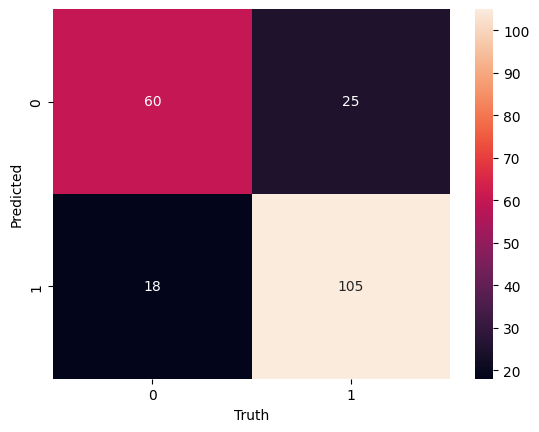

In [32]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show()

#### BernoulliNB

In [33]:
from sklearn.naive_bayes import BernoulliNB
clf2 = BernoulliNB()
clf2.fit(X_train, y_train)
clf2.score(X_test,y_test)

0.7836538461538461

In [34]:
# Predicting the Test set results
y_pred = clf1.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
print('Classification Report\n', classification_report(y_test, y_pred))
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[ 60  25]
 [ 18 105]]
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        85
           1       0.81      0.85      0.83       123

    accuracy                           0.79       208
   macro avg       0.79      0.78      0.78       208
weighted avg       0.79      0.79      0.79       208



Accuracy is  79.33 %
Precision is  0.81
Recall is  0.85


#### pickl clf1

In [35]:
# f = open('rest_model.pkl','wb')
# pickle.dump(clf1,f)
# f.close()

#### conclusion --> final model is clf1 Multinomial NB

In [36]:
a = ' good teste'

In [37]:
a_cv=cv.transform([a]).toarray()

In [38]:
clf1.predict(a_cv)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [39]:
b='bad taste'

In [40]:
b_cv=cv.transform([b]).toarray()

In [41]:
clf1.predict(b_cv)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [42]:
c = 'not good'

In [43]:
c_cv = cv.transform([c]).toarray()

In [44]:
result=clf1.predict(c_cv)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [45]:
result[0]

1

In [46]:
if "not " in a:
    result[0] = abs (result[0]-1)
print(result)

[1]
